In [1]:
import json
import pandas as pd
import numpy as np
import mltools as ml
# import relevant parts of sklearn
from sklearn import cluster, datasets, linear_model, preprocessing
from sklearn.metrics import *
#mean_squared_error, r2_score

# We'll also import seaborn, a Python graphing library
# (you may need to run >conda install seaborn (if using Anaconda)) 
import seaborn as sns

# and matplotlib
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True) 
plt.style.use('ggplot')
%matplotlib inline

import scipy.stats as stats

# and turn off annoying warnings...(if we were writing "real code" we shouldn't do this)
import warnings 
warnings.simplefilter('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
user = pd.read_csv('/Users/yangtang/Desktop/user.csv')

In [3]:
user[:3]

,create_at,text,domain,source_reliability,gender,Age,confirmed_number,account_age,user_attitude,followers_count,friends_count,stateName,reliability
0,2020-01-22T01:03:05.000Z,the microbiologist in me is cringing over “1st...,cbc,a,Unknow,Unknow,555,8,neutral,225,196,Texas,FAKE
1,2020-01-22T02:50:41.000Z,First confirmed coronavirus case identified in...,twitter,a,Unknow,Unknow,555,10,neutral,6819,4040,Texas,FAKE
2,2020-01-22T05:45:31.000Z,Coronavirus 2019 is now a notifiable condition...,youtu,b,Unknow,Unknow,555,9,neutral,11392,11527,Maryland,FAKE


In [4]:
len(user)

25238

In [5]:
np.random.seed(0)
Y = user[user.columns[-1]]
#Y = user[user.columns[-1]].astype('category').cat.codes
X= user[['followers_count','friends_count','stateName',"source_reliability","Age","gender","confirmed_number",'account_age','user_attitude']]
X["stateName"] = X["stateName"].astype('category').cat.codes
X["source_reliability"] = X["source_reliability"].astype('category').cat.codes
X['user_attitude'] = X['user_attitude'].astype('category').cat.codes
X["Age"] = X["Age"].astype('category').cat.codes
X["gender"] = X["gender"].astype('category').cat.codes
X["confirmed_number"] = X["confirmed_number"]
X['account_age'] = X['account_age']

In [6]:
X.columns

Index(['followers_count', 'friends_count', 'stateName', 'source_reliability',
       'Age', 'gender', 'confirmed_number', 'account_age', 'user_attitude'],
      dtype='object')

In [7]:
Y

id
1219787532688379905    FAKE
1219814614206177281    FAKE
1219858612299931649    FAKE
1219897414024384513    FAKE
1219943002443014145    FAKE
                       ... 
1238129818119667712    FAKE
1238129966715297794    FAKE
1238130651615973376    FAKE
1238131496478814209    REAL
1238132034545090560    FAKE
Name: reliability, Length: 39805, dtype: object

K-value= 1  Error Rate Test= 0.2846256908390554
K-value= 1  Error Rate Train= 0.010766966945411478

K-value= 10  Error Rate Test= 0.2143694523530397
K-value= 10  Error Rate Train= 0.19534867027958225

K-value= 50  Error Rate Test= 0.20725171663038017
K-value= 50  Error Rate Train= 0.2042134730646377

K-value= 100  Error Rate Test= 0.20708424049572935
K-value= 100  Error Rate Train= 0.2040340236155475

K-value= 500  Error Rate Test= 0.20708424049572935
K-value= 500  Error Rate Train= 0.2040340236155475

K-value= 1000  Error Rate Test= 0.20708424049572935
K-value= 1000  Error Rate Train= 0.2040340236155475

K-value= 2000  Error Rate Test= 0.20708424049572935
K-value= 2000  Error Rate Train= 0.2040340236155475

K-value= 5000  Error Rate Test= 0.20708424049572935
K-value= 5000  Error Rate Train= 0.2040340236155475

Training and validation error as a function of K:


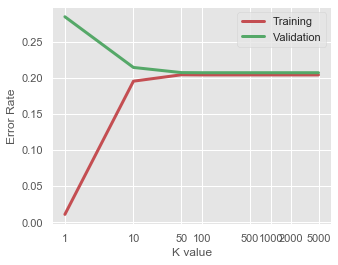

In [10]:
#KNN at different K values
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
K=[1,10,50,100,500,1000,2000,5000]
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
a=[]
b=[]
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    yp=knn.predict(X_test).tolist()
    ypp=knn.predict(X_train).tolist()
    
    count=0
    for i in range(len(yp)):
        if yp[i] != y_test.tolist()[i]:
            count+=1
    a.append(count/len(yp))
    print("K-value=",k," Error Rate Test=",count/len(yp))
    
    count2=0
    for i in range(len(ypp)):
        if ypp[i] != y_train.tolist()[i]:
            count2+=1
    b.append(count2/len(ypp))
    print("K-value=",k," Error Rate Train=",count2/len(ypp))
    print()
    
ax.semilogx(K, b, 'r-', lw=3, label='Training') 
ax.semilogx(K, a, 'g-', lw=3, label='Validation') 
ax.legend()
ax.set_ylabel("Error Rate")
ax.set_xlabel("K value")
ax.set_xticks([1,10,50,100,500,1000,2000,5000])
ax.set_xticklabels([1,10,50,100,500,1000,2000,5000])
print("Training and validation error as a function of K:") 
plt.show()

Validation error as a function of K:


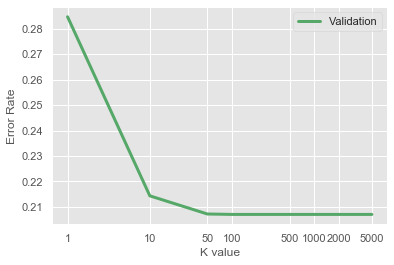

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
#ax.semilogx(K, b, 'r-', lw=3, label='Training') 
ax.semilogx(K, a, 'g-', lw=3, label='Validation') 
ax.legend()
ax.set_ylabel("Error Rate")
ax.set_xlabel("K value")
print("Validation error as a function of K:") 
ax.set_xticks([1,10,50,100,500,1000,2000,5000])
ax.set_xticklabels([1,10,50,100,500,1000,2000,5000])
plt.show()

In [12]:
#RandomForest at different test data size
from sklearn.model_selection import train_test_split
sp=[0.1,0.3,0.5,0.75,0.9]
spa=[]
spb=[]
for i in sp:
    print(i)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i) 
    clf=RandomForestClassifier(n_estimators=200)
    clf.fit(X_train,y_train)
    
    y_pred=clf.predict(X_test)
    a=metrics.accuracy_score(y_test, y_pred)
    spa.append(a)
    print("Accuracy:",a)
    
    y_pred2=clf.predict(X_train)
    b=metrics.accuracy_score(y_train, y_pred2)
    spb.append(b)
    print("Accuracy:",b)

0.1
Accuracy: 0.8136146696809847
Accuracy: 0.9882201875837427
0.3
Accuracy: 0.8133478479316697
Accuracy: 0.9898431611814952
0.5
Accuracy: 0.8073154800783802
Accuracy: 0.9918601145613506
0.75
Accuracy: 0.8011321765927514
Accuracy: 0.9957793186614411
0.9
Accuracy: 0.7968736915561758
Accuracy: 0.9972361809045226


Training and Validation Accuracy at different test data size:


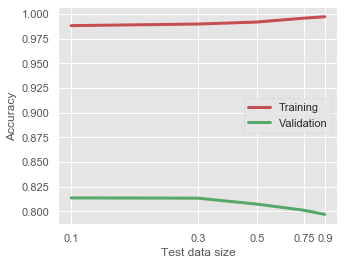

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.semilogx(sp,spb, 'r-', lw=3, label='Training') 
ax.semilogx(sp,spa, 'g-', lw=3, label='Validation') 
ax.legend()
ax.set_ylabel("Accuracy")
ax.set_xlabel("Test data size")
#plt.ylim(0.5, 1.2)
ax.set_xticks([0.1,0.3,0.5,0.75,0.9])
ax.set_xticklabels([0.1,0.3,0.5,0.75,0.9])
print("Training and Validation Accuracy at different test data size:") 
plt.show()

Training Accuracy at different test data size:


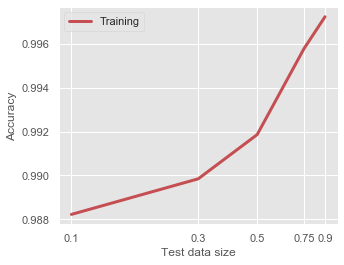

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.semilogx(sp,spb, 'r-', lw=3, label='Training') 
ax.legend()
ax.set_ylabel("Accuracy")
ax.set_xlabel("Test data size")
#plt.ylim(0.5, 1.2)
ax.set_xticks([0.1,0.3,0.5,0.75,0.9])
ax.set_xticklabels([0.1,0.3,0.5,0.75,0.9])
print("Training Accuracy at different test data size:") 
plt.show()

Validation Accuracy at different test data size:


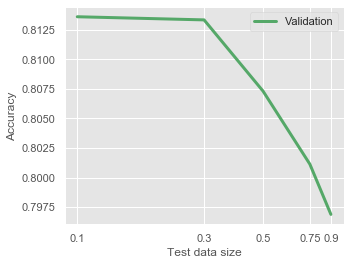

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.semilogx(sp,spa, 'g-', lw=3, label='Validation') 
ax.legend()
ax.set_ylabel("Accuracy")
ax.set_xlabel("Test data size")
#plt.ylim(0.5, 1.2)
ax.set_xticks([0.1,0.3,0.5,0.75,0.9])
ax.set_xticklabels([0.1,0.3,0.5,0.75,0.9])
print("Validation Accuracy at different test data size:") 
plt.show()

In [14]:
#RandomForest at different n_estimator
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) 
ne=[50,100,200,500,1000,2000,5000]
acc=[]
bcc=[]
for i in ne:
    print(i)
    clf=RandomForestClassifier(n_estimators=i)
    clf.fit(X_train,y_train)
    
    y_pred=clf.predict(X_test)
    a=metrics.accuracy_score(y_test, y_pred)
    acc.append(a)
    print("Accuracy:",a)
    
    y_pred2=clf.predict(X_train)
    b=metrics.accuracy_score(y_train, y_pred2)
    bcc.append(b)
    print("Accuracy:",b)

50
Accuracy: 0.8037179701892481
Accuracy: 0.9889100240462262
100
Accuracy: 0.807234969016915
Accuracy: 0.9894842622833148
200
Accuracy: 0.808658516161447
Accuracy: 0.9895560420629509
500
Accuracy: 0.8070674928822643
Accuracy: 0.9895560420629509
1000
Accuracy: 0.8077373974208675
Accuracy: 0.9895560420629509
2000
Accuracy: 0.8088259922960978
Accuracy: 0.9895560420629509
5000
Accuracy: 0.8079886116228437
Accuracy: 0.9895560420629509


Validation and Training accuracy at different n_estimators:


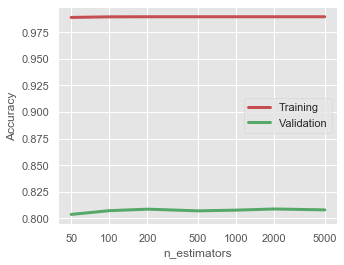

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.semilogx(ne,bcc, 'r-', lw=3, label='Training') 
ax.semilogx(ne,acc, 'g-', lw=3, label='Validation') 
ax.legend()
ax.set_ylabel("Accuracy")
ax.set_xlabel("n_estimators")
#plt.ylim(0.5, 1.2)
ax.set_xticks([50,100,200,500,1000,2000,5000])
ax.set_xticklabels([50,100,200,500,1000,2000,5000])
print("Validation and Training accuracy at different n_estimators:") 
plt.show()

Validation accuracy at different n_estimators:


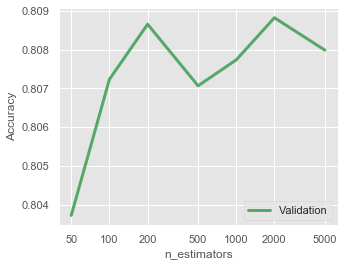

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.semilogx(ne,acc, 'g-', lw=3, label='Validation') 
ax.legend()
ax.set_ylabel("Accuracy")
ax.set_xlabel("n_estimators")
#plt.ylim(0.5, 1.2)
ax.set_xticks([50,100,200,500,1000,2000,5000])
ax.set_xticklabels([50,100,200,500,1000,2000,5000])
print("Validation accuracy at different n_estimators:") 
plt.show()

Training accuracy at different n_estimators:


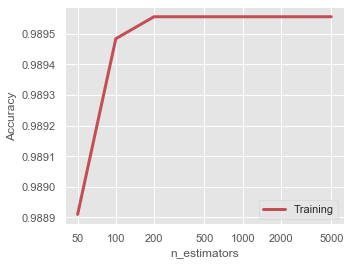

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.semilogx(ne,bcc, 'r-', lw=3, label='Training') 
ax.legend()
ax.set_ylabel("Accuracy")
ax.set_xlabel("n_estimators")
#plt.ylim(0.5, 1.2)
ax.set_xticks([50,100,200,500,1000,2000,5000])
ax.set_xticklabels([50,100,200,500,1000,2000,5000])
print("Training accuracy at different n_estimators:") 
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) 
clf=RandomForestClassifier(n_estimators=2000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8101658013733043


Feature ranking:
1. feature 0 (0.212801)
2. feature 1 (0.208609)
3. feature 6 (0.156437)
4. feature 3 (0.121538)
5. feature 2 (0.110813)
6. feature 7 (0.085936)
7. feature 8 (0.041556)
8. feature 4 (0.040065)
9. feature 5 (0.022247)


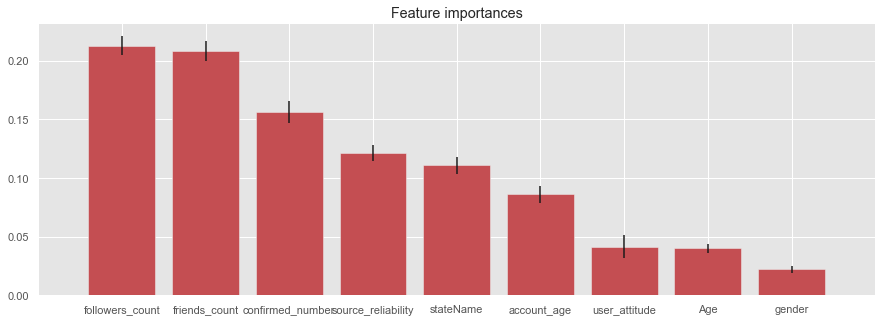

In [36]:
# feature_importances
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(15,5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
#plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.xticks(range(X.shape[1]),['followers_count', 'friends_count', 'confirmed_number', 'source_reliability','stateName','account_age',  'user_attitude','Age', 'gender'])
plt.show()